<a href="https://colab.research.google.com/github/AndrewBoessen/CSCI3387_Notebooks/blob/main/CNN_Based_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AndrewBoessen/VQ-VAE.git

Cloning into 'VQ-VAE'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 154 (delta 17), reused 32 (delta 11), pack-reused 111 (from 1)
Receiving objects: 100% (154/154), 138.70 MiB | 20.61 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Updating files: 100% (32/32), done.


In [ ]:
%cd VQ-VAE

/content/VQ-VAE


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
from vqvae import VQVAE
from demo import load_checkpoint, visualize_reconstructions
from train import read_config
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
checkpoint = "/content/VQ-VAE/checkpoints/model_checkpoint_20000.pth"

In [ ]:
config_path = "/content/VQ-VAE/config.yaml"  # Adjust this path as needed
config = read_config(config_path)

In [ ]:
model = VQVAE(
        config.architecture.num_hiddens,
        config.architecture.num_residual_layers,
        config.architecture.num_residual_hiddens,
        config.architecture.num_embeddings,
        config.architecture.embedding_dim,
        config.training.commitment_cost,
        config.training.decay,
    ).to(device)
model = load_checkpoint(model, checkpoint, device)
model.eval()

/content/VQ-VAE/demo.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


VQVAE(
  (_encoder): Encoder(
    (_conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (_conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (_conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (_residual_stack): ResidualStack(
      (_layers): ModuleList(
        (0-1): 2 x Residual(
          (_block): Sequential(
            (0): ReLU(inplace=True)
            (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (2): ReLU(inplace=True)
            (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          )
        )
      )
    )
  )
  (_pre_vq_conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
  (_vq): VectorQuantizeEMA(
    (_embedding): Embedding(512, 64)
  )
  (_decoder): Decoder(
    (_conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (_residual_stack): ResidualStack(
      (_layers): ModuleList(
   

#Load Validation Data from Google Drive

## Link to folder with train / validation datasets: [here](https://drive.google.com/drive/folders/1-0_mShSbQWr9MkjEcHJxi76hhSJ4rpRt?usp=sharing)

## Save a copy to google drive to run the demo code below

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install necessary libraries
import numpy as np

# Load the .npy file
file_path = '/content/drive/MyDrive/skiing_agent_data_crop/val/observations/frames_shard_0.npy'
data = np.load(file_path)

# Print the shape of the loaded data
print(f"Loaded data shape: {data.shape}")

Mounted at /content/drive
Loaded data shape: (2000, 256, 256, 3)


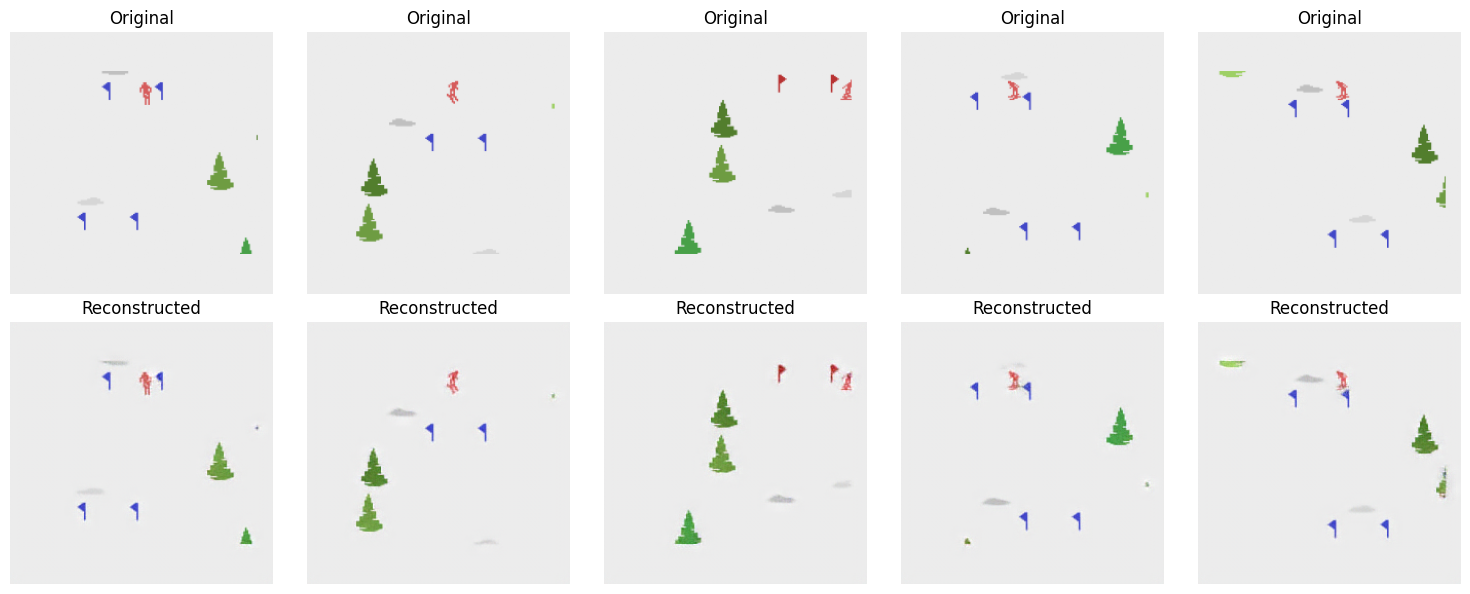

In [ ]:
visualize_reconstructions(model, data / 255.0)